# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


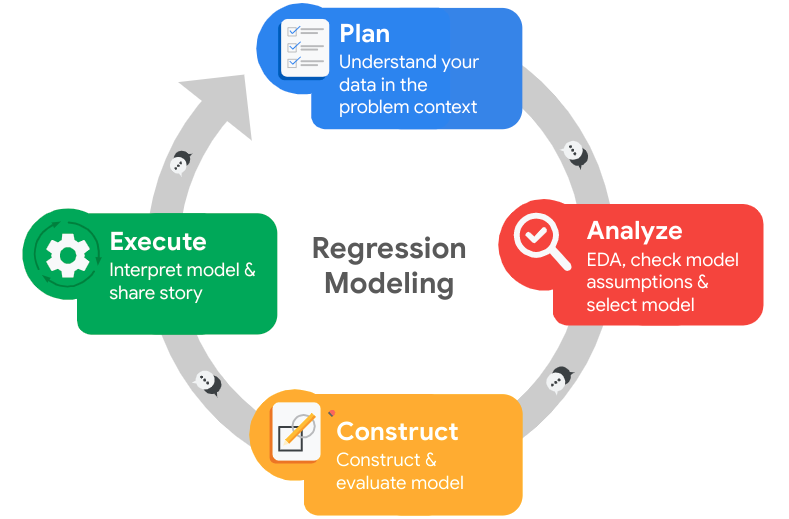

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




Stakeholders: leadership team, human resources

Observation: features based on time spent on company

Ethical considerations: if the model falsely predicts that an employee will leave when they won't, unnecessary actions might be used to deter them from leaving. If the model falsely predicts that an employee will stay when they plan on leaving, the company will not effectively use resources to maintain this employee

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, PredefinedSplit, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [ ]:
# Load dataset into a dataframe
df0 = pd.read_csv(os.path.join("..", "csv","HR_capstone_dataset.csv"))

# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [11]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [12]:
# Gather descriptive statistics about the data
df0.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,NaN,NaN,NaN,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,NaN,NaN,NaN,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,NaN,NaN,NaN,3.803054,1.232592,2.0,3.0,4.0,5.0,7.0
average_montly_hours,14999.0,NaN,NaN,NaN,201.050337,49.943099,96.0,156.0,200.0,245.0,310.0
time_spend_company,14999.0,NaN,NaN,NaN,3.498233,1.460136,2.0,3.0,3.0,4.0,10.0
Work_accident,14999.0,NaN,NaN,NaN,0.14461,0.351719,0.0,0.0,0.0,0.0,1.0
left,14999.0,NaN,NaN,NaN,0.238083,0.425924,0.0,0.0,0.0,0.0,1.0
promotion_last_5years,14999.0,NaN,NaN,NaN,0.021268,0.144281,0.0,0.0,0.0,0.0,1.0
Department,14999,10,sales,4140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary,14999,3,low,7316,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [13]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [14]:
# Rename columns as needed
df0 = df0.rename({'Work_accident': 'work_accident',
                  'average_montly_hours':'average_monthly_hours',
                  'promotion_last_5years': 'promotion_last_five_years', 
                  'Department':'department'}, axis=1)

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_five_years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [15]:
# Check for missing values
df0.isna().sum()

satisfaction_level           0
last_evaluation              0
number_project               0
average_monthly_hours        0
time_spend_company           0
work_accident                0
left                         0
promotion_last_five_years    0
department                   0
salary                       0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [16]:
# Check for duplicates
df0.duplicated()


0        False
1        False
2        False
3        False
4        False
         ...  
14994     True
14995     True
14996     True
14997     True
14998     True
Length: 14999, dtype: bool

In [17]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated(keep="first")==True]


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_five_years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [48]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates()


# Display first few rows of new dataframe as needed
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_five_years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

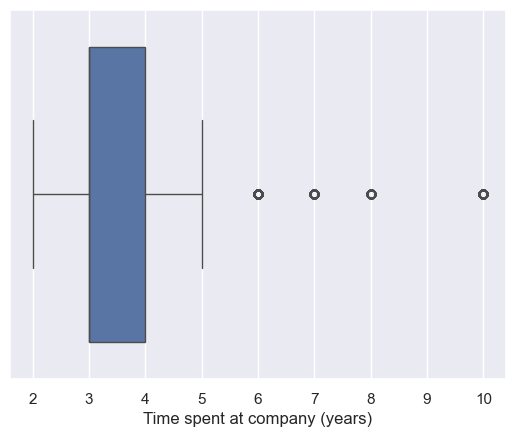

In [49]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
sns.set_theme()
sns.boxplot(x=df1['time_spend_company'], data=df1)
plt.xlabel('Time spent at company (years)')
plt.show()

In [50]:
# Determine the number of rows containing outliers
(df1['time_spend_company'] > df1['time_spend_company'].quantile(0.75)).sum()

1886

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




Some distributions are skewed
Some distributions are normal
EDA - find outliers/missing values/change dtypes as needed

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [51]:
# Get numbers of people who left vs. stayed
print(df1['left'].value_counts())

# Get percentages of people who left vs. stayed
print(df1['left'].value_counts(normalize=True))


left
0    10000
1     1991
Name: count, dtype: int64
left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [52]:
df1.dtypes

satisfaction_level           float64
last_evaluation              float64
number_project                 int64
average_monthly_hours          int64
time_spend_company             int64
work_accident                  int64
left                           int64
promotion_last_five_years      int64
department                    object
salary                        object
dtype: object

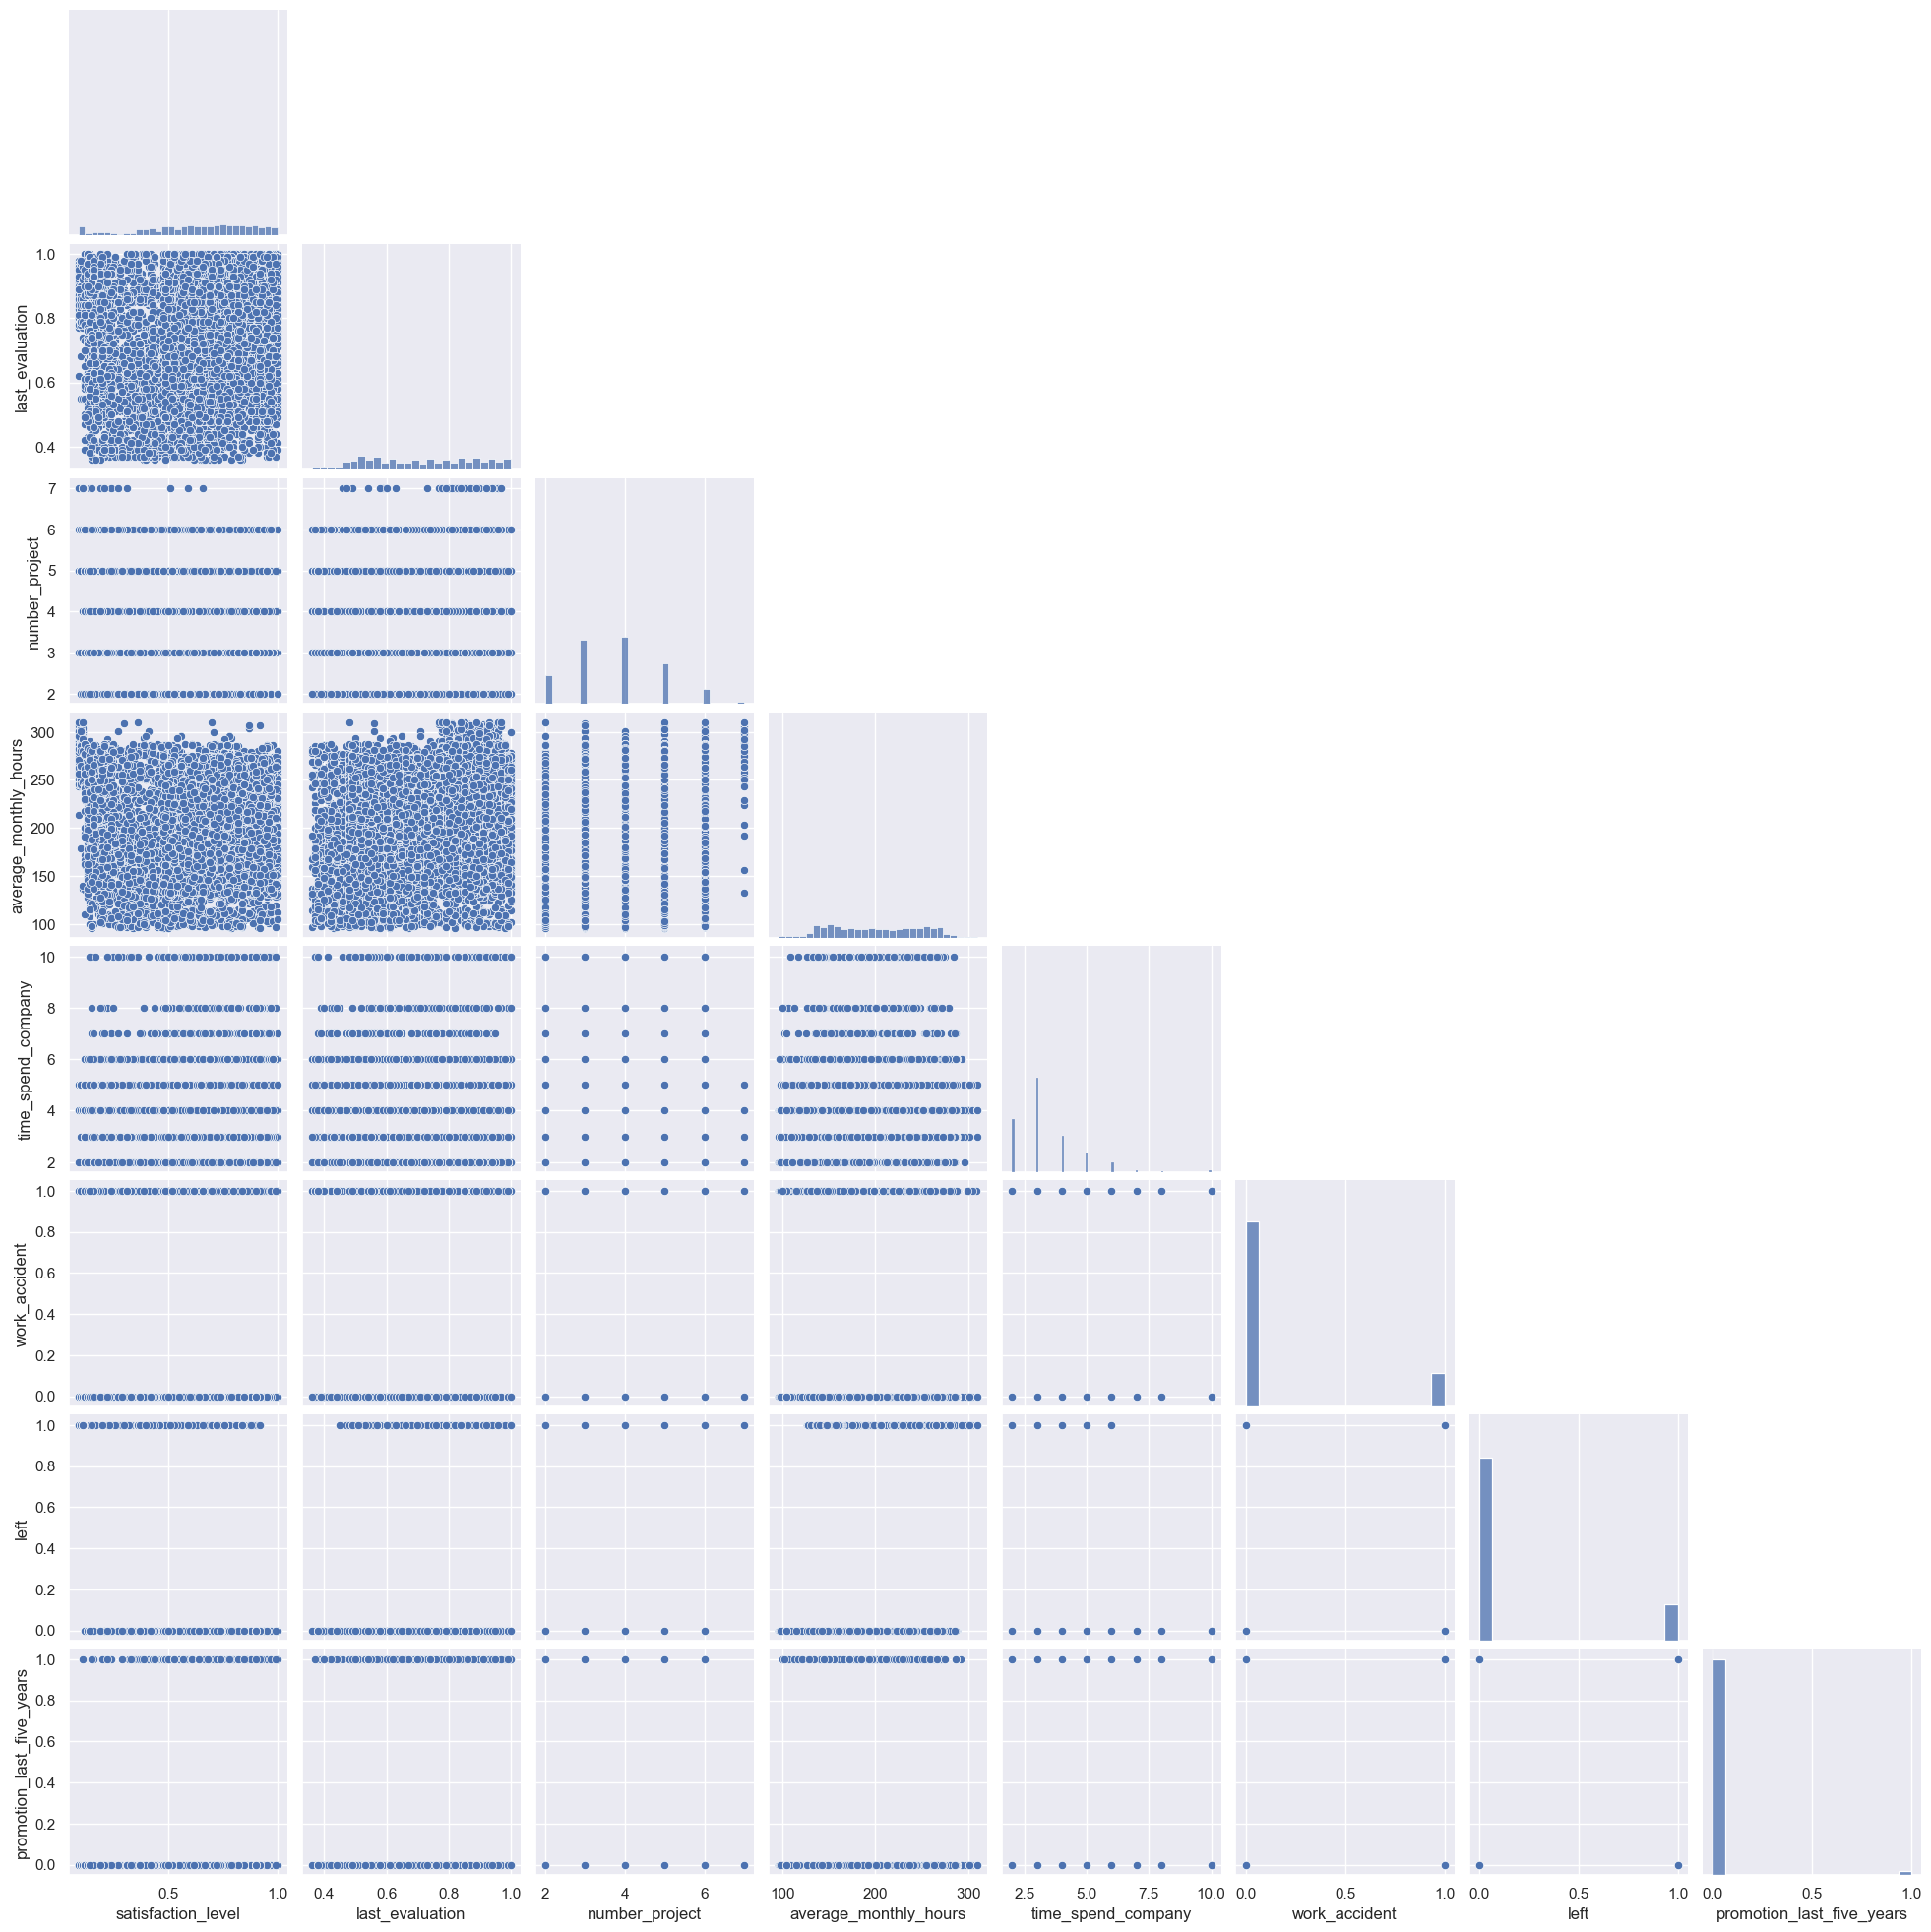

In [53]:
# determine if features are linearly correlated with features or multicolinearity between features exists
continuous_cols = [col for col in df1.columns if df1[col].dtype in ['int64', 'float64']]
sns.pairplot(df1[continuous_cols], corner=True);

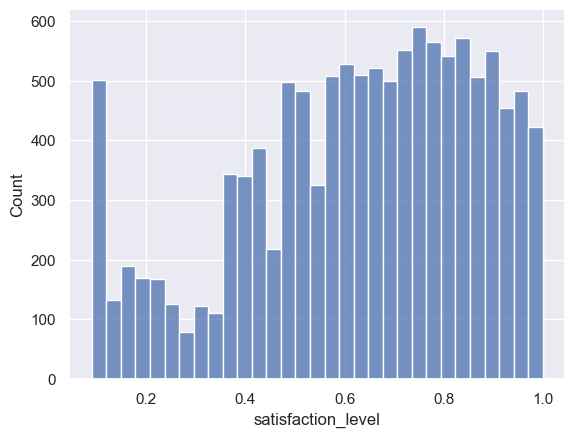

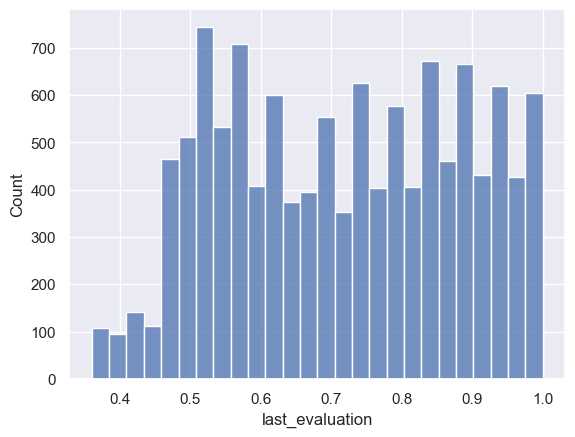

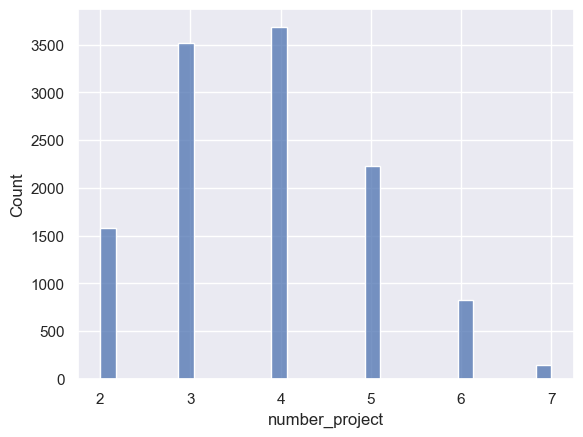

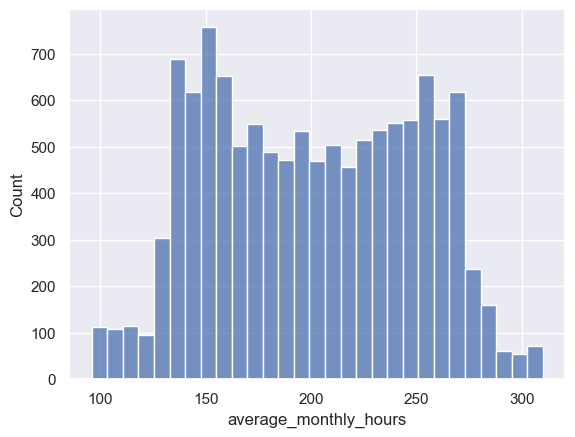

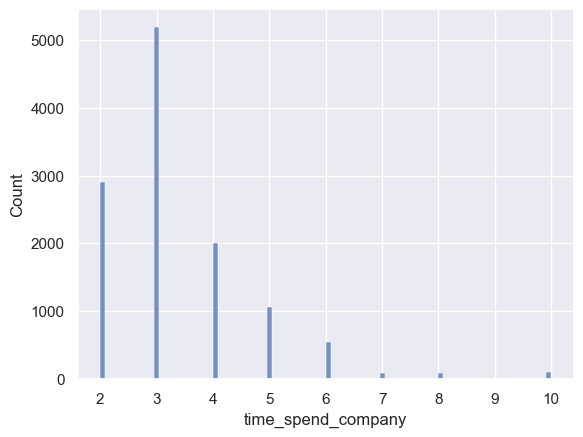

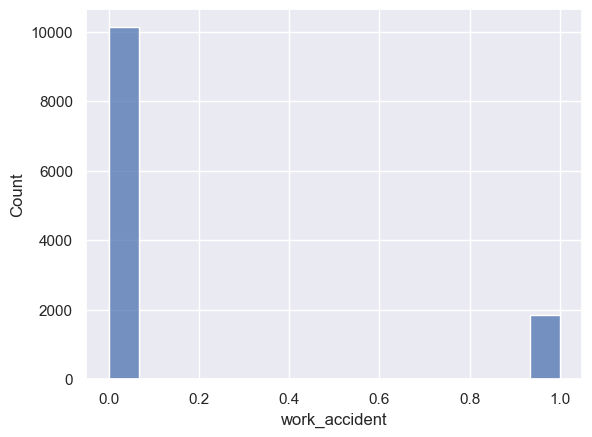

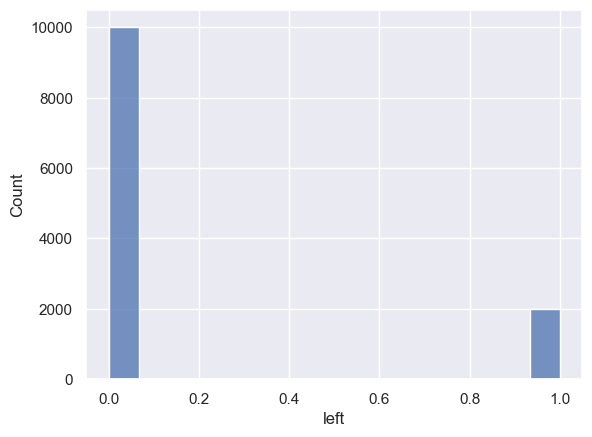

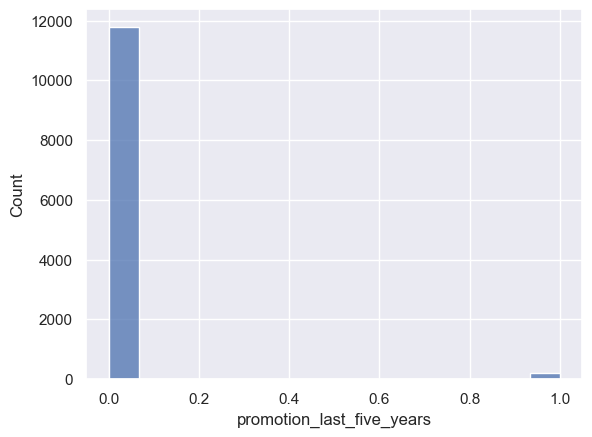

In [54]:
# examine distributions of features and target
sns.set_theme()
for feature in continuous_cols:
    sns.histplot(x=feature, data=df1)
    plt.show()


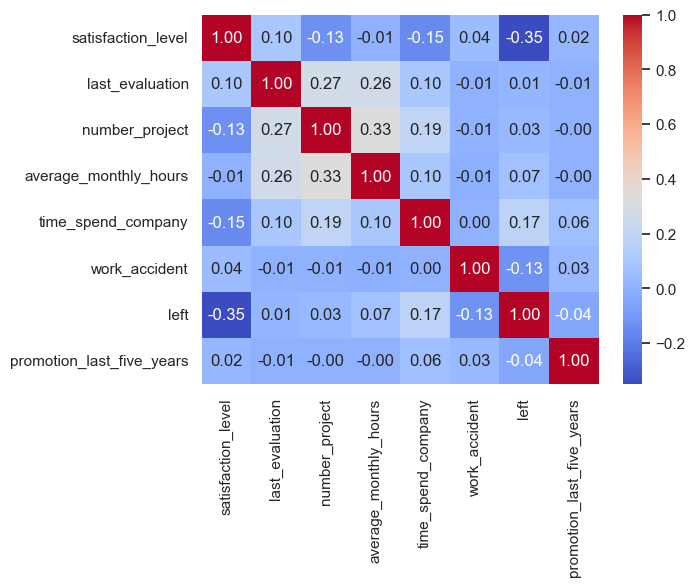

In [58]:
sns.heatmap(df1.corr(numeric_only=True),
            annot=True,
            fmt = ".2f",
            cmap='coolwarm');

In [59]:
# dummy encode categorical columns
df2 = pd.get_dummies(df1,
                     drop_first=True,
                     dtype=int)


In [60]:
df2.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_five_years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


### Insights

There are no linear relationships present in the dataset. Some distributions are skewed. About the same people who leave are the same number of people that do not have any work accidents.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

Objective binary classification of employees who leave the company

### Identify the types of models most appropriate for this task.

Random forest, XGBoost classification

### Modeling

Add as many cells as you need to conduct the modeling process.

In [61]:
X = df2.copy()
y = X.pop('left')

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, stratify=y, random_state=42)
X_tr, X_valid, y_tr, y_valid = train_test_split(X_train, y_train, train_size=0.80, test_size=0.20, stratify=y_train, random_state=42)

In [30]:
# hyperparameters
cv_params = {'max_depth': [6, 7, 8, None],
             'min_samples_leaf':[1], # best param
             'min_samples_split':[2], #best param
             'max_features':[5, 6, 7],
             'n_estimators':[85, 90]}

scoring = ('accuracy', 'precision', 'recall', 'f1')

In [31]:
# split indices
split_index = [0 if x in X_valid.index else -1 for x in X_train.index]
custom_split = PredefinedSplit(split_index)

In [32]:
rf = RandomForestClassifier(random_state=42)
rf_val = GridSearchCV(
    estimator=rf,
    param_grid=cv_params,
    scoring=scoring,
    cv=custom_split,
    refit='f1'
)

In [33]:
%%time 
rf_val.fit(X_train, y_train)

CPU times: total: 8.36 s
Wall time: 8.42 s


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [6, 7, ...], 'max_features': [5, 6, ...], 'min_samples_leaf': [1], 'min_samples_split': [2], ...}"
,scoring,"('accuracy', ...)"
,n_jobs,None
,refit,'f1'
,cv,"PredefinedSpl......, 0, -1]))"
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,85


In [34]:
rf_val.best_params_

{'max_depth': None,
 'max_features': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 85}

In [35]:
rf_opt = RandomForestClassifier(
    max_depth=None,
    max_features=6,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=85,
    random_state=42
)

In [36]:
rf_opt.fit(X_train, y_train)

,n_estimators,85
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,6
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [37]:
y_pred_train = rf_opt.predict(X_train)
y_pred_test = rf_opt.predict(X_test)

In [38]:
results_df = pd.DataFrame()

def make_results(model_name, y_true, y_pred):
    global results_df
    sample_df = pd.DataFrame(
        {'Model': model_name,
         'Accuracy Score': accuracy_score(y_true, y_pred),
         'F1 Score': f1_score(y_true, y_pred),
         'Precision Score': precision_score(y_true, y_pred),
         'Recall Score': recall_score(y_true, y_pred)},
         index=[0]
    )
    results_df = pd.concat([results_df, sample_df], ignore_index=True)
    return results_df

In [39]:
make_results('RF_Train', y_train, y_pred_train)
make_results('RF_Test', y_test, y_pred_test)

,Model,Accuracy Score,F1 Score,Precision Score,Recall Score
0,RF_Train,1.000000,1.000000,1.000000,1.000000
1,RF_Test,0.985827,0.955844,0.989247,0.924623


In [80]:
X_train.dtypes

satisfaction_level           float64
last_evaluation              float64
number_project                 int64
average_monthly_hours          int64
time_spend_company             int64
work_accident                  int64
promotion_last_five_years      int64
department_RandD               int32
department_accounting          int32
department_hr                  int32
department_management          int32
department_marketing           int32
department_product_mng         int32
department_sales               int32
department_support             int32
department_technical           int32
salary_low                     int32
salary_medium                  int32
dtype: object

### Save the model on Full Data

In [76]:
import joblib

# Pickle the model
rf_opt.fit(X, y)

joblib.dump(rf_opt, "models/rf_opt.joblib", compress=('xz', 3), protocol=5)

['models/rf_opt.joblib']

### Open the model

In [83]:
# Open pickled model
rf_opt = joblib.load("models/rf_opt.joblib")

sample_test_data = pd.DataFrame(X_test.iloc[0]).T
sample_test_data

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_five_years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
11555,0.98,0.44,4.0,154.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [69]:
y_test.iloc[0]

0

In [73]:
rf_opt.predict(sample_test_data)

array([0], dtype=int64)

# PACE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results


In [64]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2001
           1       0.99      0.92      0.96       398

    accuracy                           0.99      2399
   macro avg       0.99      0.96      0.97      2399
weighted avg       0.99      0.99      0.99      2399



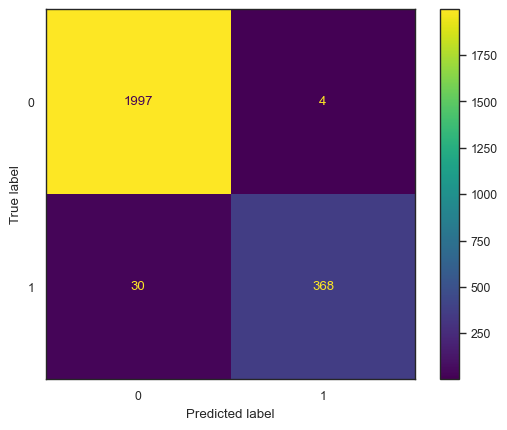

In [42]:
sns.set_theme('paper', 'white')
cm = confusion_matrix(y_test, y_pred_test, labels=rf_val.classes_)
cm_plot = ConfusionMatrixDisplay(cm, display_labels=rf_val.classes_)
cm_plot.plot();

In [43]:
y_test.value_counts()

left
0    2001
1     398
Name: count, dtype: int64

Of the 398 employees that left the company in the test set, the model correctly predicted 368. The largest error the model makes is a Type II error where the model falsely predicts an employee will stay even though they will leave.

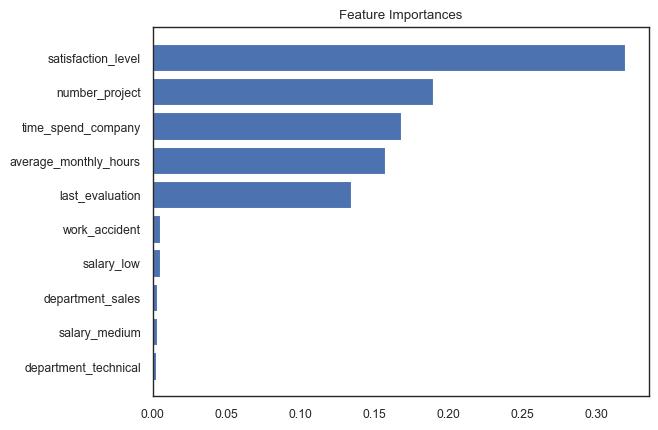

In [44]:
feature_importances = rf_val.best_estimator_.feature_importances_
feature_importances = pd.Series(feature_importances, index=X_test.columns).sort_values(ascending=False)
plt.barh(width=feature_importances[:10], y=feature_importances.index[:10])
plt.gca().invert_yaxis()
plt.title('Feature Importances')
plt.show()

### Conclusion, Recommendations, Next Steps

It appears that the largest factors influencing an employee's decision to leave are employee satisfaction, the number projects they work on, and the time spent at the company. Employees who spend longer amounts of time at the company with a high number of project seem more prone to leaving. The company should evaluate how many projects an employee works on for a given time period to reduce the employee turnover.